In [46]:
import cv2 as cv
import pandas as pd 
import numpy as np
import os
import glob
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.neighbors  import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from collections import defaultdict

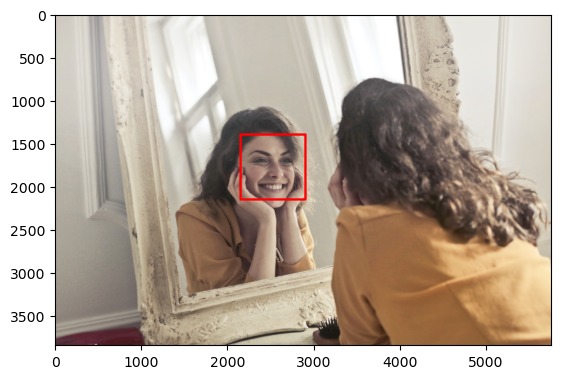

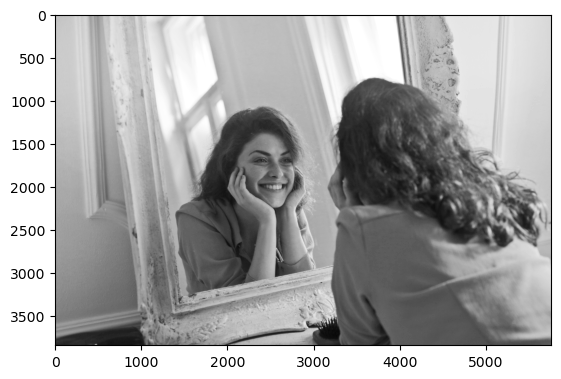

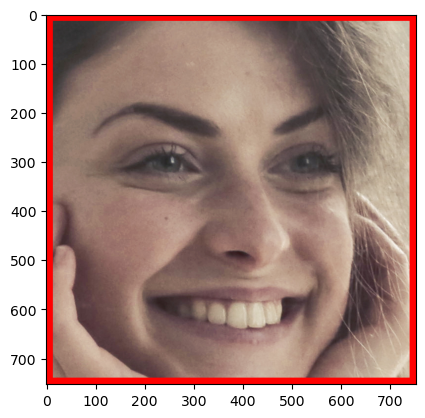

' print(imgs.shape)\nprint(pixel)\nplt.imshow(imgs)\nplt.show()\nplt.imshow(gray, cmap="gray")\nplt.show() \nplt.imshow(hog_img,cmap="gray")\nplt.show()  '

In [39]:
a=[]
b=[]
#266004
#774866
imgs = np.array(cv.imread('imgs/Test/happy/1happy774866.jpg'))
# converting BGR to RGB
img_rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)

mountCascade = cv.CascadeClassifier('haarcascade_mcs_mouth.xml')
faceCascade = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')
gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(img_rgb,scaleFactor = 1.05, minNeighbors = 3, minSize = (100,100))
for (x, y, w, h) in faces:
    cv.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0 , 0), 25)
    faces = img_rgb[y:y + h, x:x + w]

plt.imshow(img_rgb)
plt.show()
plt.imshow(gray,cmap="gray")
plt.show()
plt.imshow(faces)
plt.show()

##feature , hog_img= hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2),visualize=True)
#pixel = feature.flatten()
#plt.imshow(imgs)
#plt.imshow(gray, cmap="gray")

""" print(imgs.shape)
print(pixel)
plt.imshow(imgs)
plt.show()
plt.imshow(gray, cmap="gray")
plt.show() 
plt.imshow(hog_img,cmap="gray")
plt.show()  """

In [56]:
EDA_dict = defaultdict(list)

def EDA_df(file_name,classes,length,widht,d):
    EDA_dict['file_name'].append(file_name)
    EDA_dict['length'].append(length)
    EDA_dict['widht'].append(widht)
    EDA_dict['resolution'].append(length*widht)
    EDA_dict['dimension'].append(d)
    EDA_dict['classes'].append(classes)

for i, happy in enumerate(glob.glob('/Users/cheukhongip/Documents/Tech_With_Tim/ImageWebScraping/Image-Scraper-And-Downloader-main/imgs/Test/happy/*happy*.jpg')):
    if i < 200:
        classes = 'happy'
        # Store file name
        file_path = happy
        file_name = os.path.basename(file_path)
        # read image
        imgs = np.array(cv.imread(happy))
        length, widht, d = imgs.shape
        # append info. into dictionary 
        EDA_df(file_name,classes,length,widht,d)
    else:
        break

for i, angry in enumerate(glob.glob('/Users/cheukhongip/Documents/Tech_With_Tim/ImageWebScraping/Image-Scraper-And-Downloader-main/imgs/Test/angry/*angry*.jpg')):
    if i < 150:
        classes = 'angry'
        # Store file name
        file_path = angry
        file_name = os.path.basename(file_path)
        # read image
        imgs = np.array(cv.imread(angry))
        length, widht, d = imgs.shape
        # append info. into dictionary 
        EDA_df(file_name,classes,length,widht,d)
    else:
        break
        
        


In [ ]:
# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
normal_images = img2np(f'{train_dir}/NORMAL/', normal_imgs)
pnemonia_images = img2np(f'{train_dir}/PNEUMONIA/', pneumo_imgs)

In [ ]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

norm_mean = find_mean_img(normal_images, 'NORMAL')
pneu_mean = find_mean_img(pnemonia_images, 'PNEUMONIA')

In [ ]:
contrast_mean = norm_mean - pneu_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Normal & Pneumonia Average')
plt.axis('off')
plt.show()

In [57]:
df = pd.DataFrame.from_dict(EDA_dict)

In [58]:
df.describe()

,length,widht,resolution,dimension
count,350.000000,350.000000,3.500000e+02,350.0
mean,4346.582857,4629.657143,2.061041e+07,3.0
std,1390.205789,1537.282935,9.339808e+06,0.0
min,1281.000000,1049.000000,1.467551e+06,3.0
25%,3456.000000,3507.000000,1.406989e+07,3.0
50%,4020.000000,4493.500000,2.102630e+07,3.0
75%,5247.250000,6000.000000,2.506579e+07,3.0
max,7943.000000,8688.000000,5.032090e+07,3.0


Text(0, 0.5, 'Number of images')

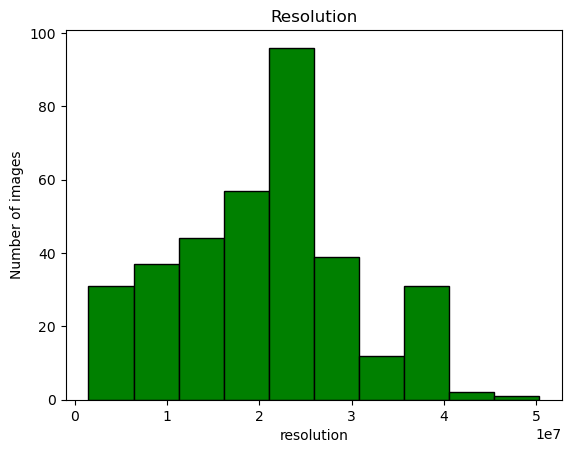

In [59]:
df['resolution'].plot(kind="hist", color = 'green', edgecolor = 'black')
plt.title("Resolution")
plt.xlabel("resolution")
plt.ylabel("Number of images")


Text(0, 0.5, 'resolution')

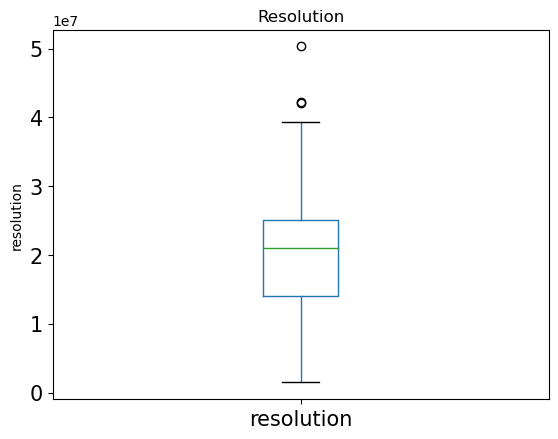

In [62]:
boxplot = df.boxplot(column = 'resolution', grid=False, fontsize=15)  
plt.title("Resolution")
plt.ylabel("resolution")

classes
angry    150
happy    200
Name: classes, dtype: int64


Text(0, 0.5, 'Number of images')

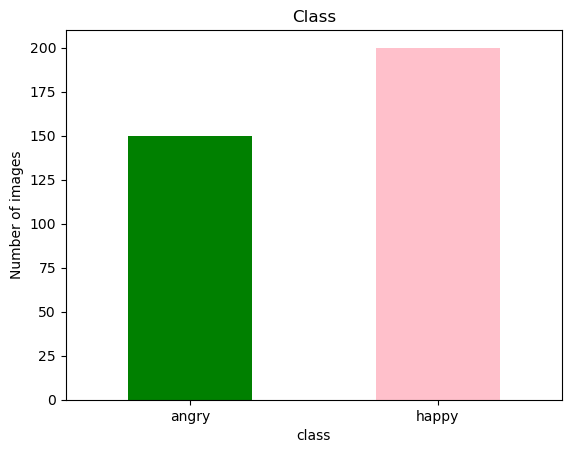

In [61]:
df2 = df.groupby(['classes'])['classes'].count()
print(df2)
df2.plot(kind="bar",color = ('green','pink'))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Class")
plt.xlabel("class")
plt.ylabel("Number of images")

In [ ]:
# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
normal_images = img2np(f'{train_dir}/NORMAL/', normal_imgs)
pnemonia_images = img2np(f'{train_dir}/PNEUMONIA/', pneumo_imgs)

In [ ]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

norm_mean = find_mean_img(normal_images, 'NORMAL')
pneu_mean = find_mean_img(pnemonia_images, 'PNEUMONIA')

In [ ]:
contrast_mean = norm_mean - pneu_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Normal & Pneumonia Average')
plt.axis('off')
plt.show()

In [45]:
for i, happy in enumerate(glob.glob('/Users/cheukhongip/Documents/Tech_With_Tim/ImageWebScraping/Image-Scraper-And-Downloader-main/imgs/Test/happy/*happy*.*')):
    classes = 'happy'
    
    file_path = happy
    file_name = os.path.basename(file_path)
    if not file_name.endswith('.jpg'):
        print(file_name)

8happy8727363.png


In [ ]:
X = []
y = []
EDA_dict = defaultdict(list)

def resize_image(x):
    imgs = np.array(cv.imread(x))
    img_rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    resize_img = cv.resize(img_rgb,(64,128))
    gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
    feature , hog_img= hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2),visualize=True)
    pixel = feature.flatten()
    return pixel , hog_img

def EDA_df(file_name,classes,length,widht,d):
    EDA_dict['file_name'].append(file_name)
    EDA_dict['length'].append(length)
    EDA_dict['widht'].append(widht)
    EDA_dict['resolution'].append(length*widht)
    EDA_dict['dimension'].append(d)
    EDA_dict['classes'].append(classes)

for i, cat in enumerate(glob.glob('Kaggle_Clean/training_set/training_set/cats/cat.*.jpg')):
    if i <1000:
        # Store file name
        file_path = cat
        file_name = os.path.basename(file_path)
        # read image
        imgs = np.array(cv.imread(cat))
        length, widht, d = imgs.shape
        # append info. into dictionary 
        EDA_df(file_name,classes,length,widht,d)
        # Feature Extract and Append into list
        feature = resize_image(cat)
        X.append(feature)
        y.append(0)
    else:
        break

